In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [96]:
def plot_timing(row):

    fig, ax = plt.subplots(nrows=funding_secured.shape[0], ncols=1, figsize=(25,10))

    datetime = row["Datetime"]
    text = row["text"]

    # remove https or http URLs
    text = text.split("https://")[0]
    text = text.split("http://")[0]
    text = text.split("pic.twitter")[0]

    # split text into 2 or 3 rows if too long
    if len(text.split())>30:
        text = text.split()
        text.insert(14, "\n")
        text.insert(29, "\n")
        text = ' '.join(text)
    elif len(text.split())>15:
        text = text.split()
        text.insert(14, "\n")
        text = ' '.join(text)

    # get idx of tsla stock base on datetime of tweet
    next_idx = tsla.index[tsla['Datetime']>datetime][0]

    # get +/- 7 day range of tesla stock price
    start_idx = next_idx - 14
    end_idx = next_idx + 14

    sub_tsla = tsla.iloc[start_idx: end_idx]

    # plot
    x = sub_tsla["Datetime"]
    y = sub_tsla["Volume"]

    ax.scatter(x, y, marker='o')
    ax.set_title(text, fontsize=20)

    ax.axvline(x=datetime, color='red')
    ax.tick_params('both', labelsize=15)

    plt.show();

In [97]:
tsla = pd.read_csv("../../data/stock_price/TSLA_30m_2y.csv")
elon = pd.read_csv("../../data/twitter/elon_clean.csv")

## Pre-process datasets

In [98]:
# convert to datetime, add timezone
tsla["Datetime"] = pd.to_datetime(tsla["Datetime"])
elon["date"] = pd.to_datetime(elon["date"], utc=True)
elon = elon.rename(columns={'date':'Datetime'})

# drop useles rows
tsla = tsla.drop(columns=['Dividends', 'Stock Splits'])
elon = elon.drop(columns=['username', 'mentions', 'hashtags', 'permalink'])

# subset only tweets with "Tesla"
elon_tesla = elon[elon["text"].str.contains("Tesla")]

# subset top tweets using retweets and favourites
elon_tesla_top = elon_tesla[(elon_tesla["retweets"]>9000) | (elon_tesla["favorites"]>58000)]


## Plot 'Funding Secured' Tweet

In [90]:
idx = 3870
tsla.iloc[idx:idx+20,:]

Datetime    Open    High     Low   Close    Volume  \
3870  2018-08-03 13:30:00-04:00  351.28  351.60  348.34  349.64    980952   
3871  2018-08-03 14:30:00-04:00  349.64  350.45  348.32  348.66    793799   
3872  2018-08-03 15:30:00-04:00  348.65  348.87  347.28  348.28   1310718   
3873  2018-08-06 09:30:00-04:00  344.91  354.98  343.99  352.46   2746237   
3874  2018-08-06 10:30:00-04:00  352.30  352.33  348.25  348.54   1284953   
3875  2018-08-06 11:30:00-04:00  348.31  350.00  346.41  348.61   1327541   
3876  2018-08-06 12:30:00-04:00  348.48  349.64  347.80  349.19    593164   
3877  2018-08-06 13:30:00-04:00  349.24  350.22  347.64  348.98    698248   
3878  2018-08-06 14:30:00-04:00  348.96  349.27  345.27  345.48    656137   
3879  2018-08-06 15:30:00-04:00  345.65  345.83  341.86  341.98   1072988   
3880  2018-08-07 09:30:00-04:00  343.10  346.72  339.15  345.83   2194659   
3881  2018-08-07 10:30:00-04:00  345.86  346.17  340.53  341.80    856736   
3882  2018-08-07 11:30:00-04:00  341.73  356.00  340.71  355.88   2660011   
3883  2018-08-07 12:30:00-04:00  355.94  371.12  354.67  360.30  11261251   
3884  2018-08-07 13:30:00-04:00  360.29  370.00  358.75  367.25   4729644   
3885  2018-08-07 15:30:00-04:00  369.75  387.44  367.52  379.56   8104184   
3886  2018-08-08 09:30:00-04:00  369.19  382.57  367.12  376.40  11085448   
3887  2018-08-08 10:30:00-04:00  376.40  379.70  373.04  374.03   3072668   
3888  2018-08-08 11:30:00-04:00  374.28  375.67  369.04  370.27   2332421   
3889  2018-08-08 12:30:00-04:00  370.31  375.70  370.31  373.51   1776184   

      Dividends  Stock Splits  
3870          0             0  
3871          0             0  
3872          0             0  
3873          0             0  
3874          0             0  
3875          0             0  
3876          0             0  
3877          0             0  
3878          0             0  
3879          0             0  
3880          0             0  
3881          0             0  
3882          0             0  
3883          0             0  
3884          0             0  
3885          0             0  
3886          0             0  
3887          0             0  
3888          0             0  
3889          0             0

In [93]:
funding_secured

Datetime  retweets  favorites  \
1529 2018-08-07 16:48:00+00:00     15827      87309   

                                                   text  
1529  Am considering taking Tesla private at $420. F...

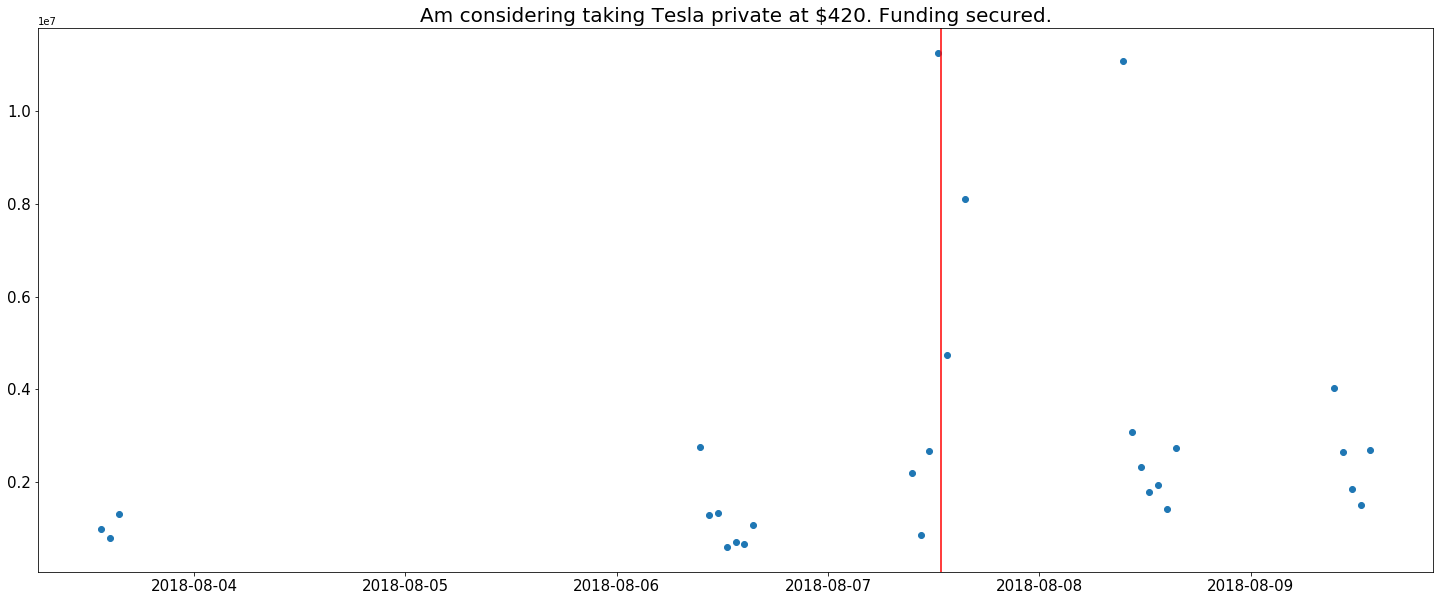

In [92]:
funding_secured = elon_tesla_top[elon_tesla_top["text"].str.contains("Am considering taking Tesla private")]

row = funding_secured.iloc[0,:]

plot_timing(row)



# Plot Stock Prices against top tweets

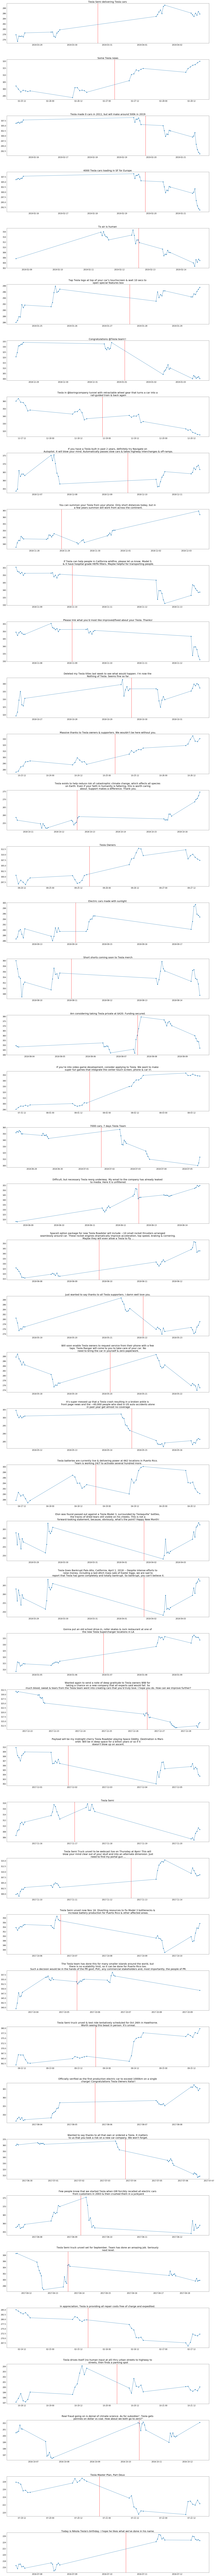

In [39]:
fig, ax = plt.subplots(nrows=elon_tesla_top.shape[0], ncols=1, figsize=(25,300))
plot_idx = 0

for i, row in elon_tesla_top.iterrows():
    
    datetime = row["Datetime"]
    text = row["text"]
    
    # remove https or http URLs
    text = text.split("https://")[0]
    text = text.split("http://")[0]
    text = text.split("pic.twitter")[0]
    
    # split text into 2 or 3 rows if too long
    if len(text.split())>30:
        text = text.split()
        text.insert(14, "\n")
        text.insert(29, "\n")
        text = ' '.join(text)
    elif len(text.split())>15:
        text = text.split()
        text.insert(14, "\n")
        text = ' '.join(text)
    
    # get idx of tsla stock base on datetime of tweet
    next_idx = tsla.index[tsla['Datetime']>datetime][0]
    
    # get +/- 7 day range of tesla stock price
    start_idx = next_idx - 14
    end_idx = next_idx + 14
    
    sub_tsla = tsla.iloc[start_idx: end_idx]
    
    # plot
    x = sub_tsla["Datetime"]
    y = sub_tsla["Close"]
    
    ax[plot_idx].plot(x, y, marker='o')
    ax[plot_idx].set_title(text, fontsize=20)
#     ax[plot_idx].set_xlim((start_date, end_date))
#     ax[plot_idx].set_ylim((y_min, y_max))

    ax[plot_idx].axvline(x=datetime, color='red')
    ax[plot_idx].tick_params('both', labelsize=15)
    
    plot_idx += 1


plt.tight_layout(pad=0.4, h_pad=5.0)
plt.show()

In [51]:
idx = 230
tsla.iloc[idx: idx+10,]

Datetime    Open    High     Low   Close   Volume
230  2016-07-08 15:30:00-04:00  217.46  217.58  216.78  216.78   416505
231  2016-07-11 09:30:00-04:00  219.99  226.78  219.52  224.24  2108871
232  2016-07-11 10:30:00-04:00  224.33  225.31  224.25  225.09   634571
233  2016-07-11 11:30:00-04:00  225.06  226.70  225.06  226.55   636909
234  2016-07-11 12:30:00-04:00  226.52  226.69  225.90  226.38   408297
235  2016-07-11 13:30:00-04:00  226.28  226.40  225.13  225.13   391608
236  2016-07-11 14:30:00-04:00  225.19  226.35  225.19  225.47   376931
237  2016-07-11 15:30:00-04:00  225.37  225.43  224.65  224.78   631711
238  2016-07-12 09:30:00-04:00  224.13  227.49  223.32  224.73  1256507
239  2016-07-12 10:30:00-04:00  224.69  226.06  224.69  226.00   419300

## Plot Volume against top tweets

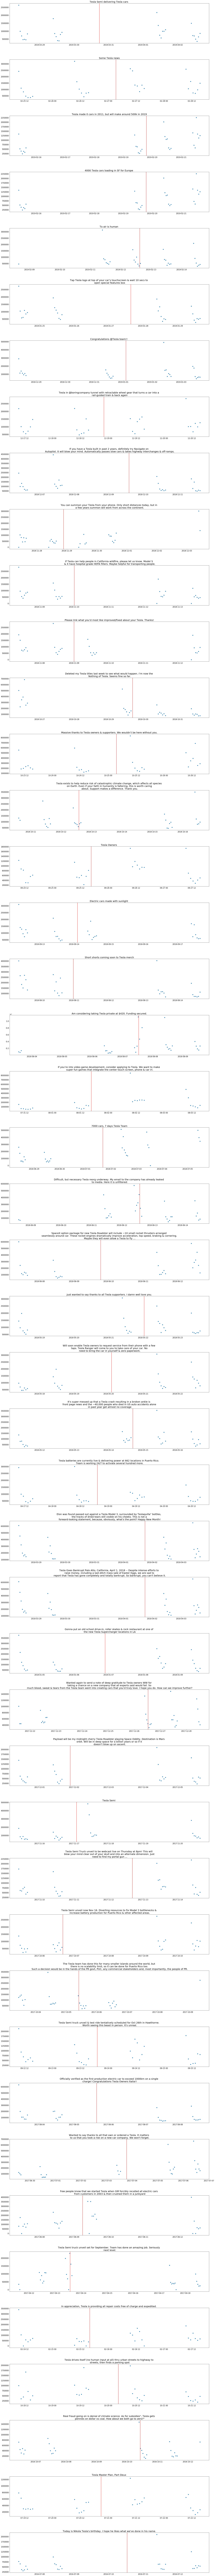

In [55]:
fig, ax = plt.subplots(nrows=elon_tesla_top.shape[0], ncols=1, figsize=(25,300))
plot_idx = 0

for i, row in elon_tesla_top.iterrows():
    
    datetime = row["Datetime"]
    text = row["text"]
    
    # remove https or http URLs
    text = text.split("https://")[0]
    text = text.split("http://")[0]
    text = text.split("pic.twitter")[0]
    
    # split text into 2 or 3 rows if too long
    if len(text.split())>30:
        text = text.split()
        text.insert(14, "\n")
        text.insert(29, "\n")
        text = ' '.join(text)
    elif len(text.split())>15:
        text = text.split()
        text.insert(14, "\n")
        text = ' '.join(text)
    
    # get idx of tsla stock base on datetime of tweet
    next_idx = tsla.index[tsla['Datetime']>datetime][0]
    
    # get +/- 7 day range of tesla stock price
    start_idx = next_idx - 14
    end_idx = next_idx + 14
    
    sub_tsla = tsla.iloc[start_idx: end_idx]
    
    # plot
    x = sub_tsla["Datetime"]
    y = sub_tsla["Volume"]
    
    ax[plot_idx].scatter(x, y, marker='o')
    ax[plot_idx].set_title(text, fontsize=20)
#     ax[plot_idx].set_xlim((start_date, end_date))
#     ax[plot_idx].set_ylim((y_min, y_max))

    ax[plot_idx].axvline(x=datetime, color='red')
    ax[plot_idx].tick_params('both', labelsize=15)
    
    plot_idx += 1


plt.tight_layout(pad=0.4, h_pad=5.0)
plt.show()